In [ ]:
# Data Source: https://www.kaggle.com/worldbank/world-development-indicators
# Folder: 'world-development-indicators'

<br><p style="font-family: Trebuchet; font-size:3.75em;color:brown; font-style:bold">
Role of Foreign Aid in Development </p><br><br>
### Do foreign aid work? How does receiving foreign aid work vs. country's spending on economic reform/infrastructure for overall development ?

In [1]:
%%capture
! pip install seaborn
import seaborn as sns
%matplotlib inline
#Import seaborn

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('./world-development-indicators/Indicators.csv')
data.shape

(5656458, 6)

In [5]:
countries = data['CountryName'].unique().tolist()
indicators = data['IndicatorName'].unique().tolist()

Reviewing the columns i.e. data attributes.

In [42]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [7]:
#indicators

#### We want to compare the relationship between Net ODA/capita, Lending Rate, and Foreign Investment Inward vs. the GDP/capita of the given year. We shall base our study in 'Nepal' and can repeat similar assessment for other countries later.

In [6]:
# Let's define the indicator filters
indicators = ['Net ODA received per capita (current US$)','Lending interest rate (%)','GDP per capita (current US$)','Foreign direct investment, net inflows (% of GDP)']
filterMesh = (data['CountryName'] == 'Nepal') & (data['IndicatorName'].isin(indicators))
nepal_all = data.loc[filterMesh]
nepal_all.shape 
#nepal_all.tail(20)

(177, 6)

Let's try and create 1 dataframe each for each indicator of interest

 We'll have to identify the total donation from differnt unique sources for each country and then group multiple data from each country to get a sum total of all aid

In [7]:
filterMesh_ODA = (data['CountryName'] == 'Nepal') & (data['IndicatorName']=='Net ODA received per capita (current US$)')
nepal_ODA = data.loc[filterMesh_ODA]
filterMesh_int = (data['CountryName'] == 'Nepal') & (data['IndicatorName']=='Lending interest rate (%)')
nepal_int = data.loc[filterMesh_int]
filterMesh_GDP = (data['CountryName'] == 'Nepal') & (data['IndicatorName']=='GDP per capita (current US$)')
nepal_GDP = data.loc[filterMesh_GDP]
filterMesh_FDI = (data['CountryName'] == 'Nepal') & (data['IndicatorName']=='Foreign direct investment, net inflows (% of GDP)')
nepal_FDI = data.loc[filterMesh_FDI]
#Let's see the shape of each df
#nepal_ODA.shape #54
#nepal_int.shape #31
#nepal_GDP.shape #55
#nepal_FDI.shape #37


Looking at the number of data points, we have similar numbers for ODA and for GDP/cap, while similar number of entries exist for interest rates and FDI %

In [8]:
# Let's concatenate 2 dataframes combining information on GDP per capital and net ODA per capita
nepal_ODA.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4783517,Nepal,NPL,Net ODA received per capita (current US$),DT.ODA.ODAT.PC.ZS,2009,32.125775
4968050,Nepal,NPL,Net ODA received per capita (current US$),DT.ODA.ODAT.PC.ZS,2010,30.449574
5147596,Nepal,NPL,Net ODA received per capita (current US$),DT.ODA.ODAT.PC.ZS,2011,32.552054
5323263,Nepal,NPL,Net ODA received per capita (current US$),DT.ODA.ODAT.PC.ZS,2012,27.989294
5485426,Nepal,NPL,Net ODA received per capita (current US$),DT.ODA.ODAT.PC.ZS,2013,31.276831


In [38]:
#Dropiing irrevant columns and renaming value from each data frames
#ODA / capita
#nepal_ODA.drop(['CountryCode', 'IndicatorName','CountryName','IndicatorCode'], axis = 1, inplace = True)
#nepal_ODA.rename(columns={'Value': 'ODA per Cap'}, inplace=True)
#nepal_ODA.reset_index
#nepal_ODA = nepal_ODA.set_index('Year')
#nepal_ODA.head()

#GDP/Cap
#nepal_GDP.head()
#nepal_GDP.drop(['CountryCode', 'IndicatorName','CountryName','IndicatorCode'], axis = 1, inplace = True)
#nepal_GDP.rename(columns={'Value': 'GDP per Cap'}, inplace=True)
#nepal_GDP.reset_index
#nepal_GDP = nepal_GDP.set_index('Year')
#nepal_GDP.head()

#Now we sneed to join two data frames corresponding to the years
final = pd.merge(nepal_ODA, nepal_GDP, on = 'Year')
final.head()
#final.shape #54
final.dropna(axis = 0, inplace = True)
#final.shape #54


We now have a dataset comprising ODA per capita with GDP per capita. Let's see the correlation between these.


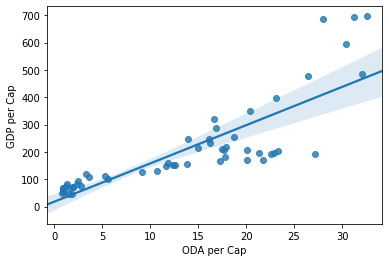

In [40]:
sns.regplot(x='ODA per Cap', y='GDP per Cap', data=final)

<b>P-value</b>: 
<p> The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [46]:
from scipy import stats

In [47]:
pearson_coef, p_value = stats.pearsonr(final['ODA per Cap'], final['GDP per Cap'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8337417202326664  with a P-value of P = 5.064253994855163e-15
